C:\Users\DONGME~1\AppData\Local\Temp/ipykernel_29172/2293910269.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.arange(-3, 5),size=12)


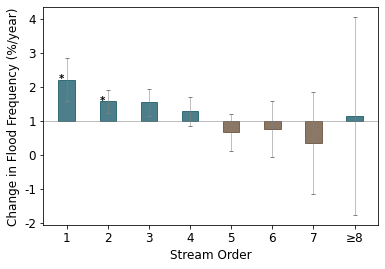

In [1]:
#not reverse flood; four panels

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, ScalarFormatter
import os

#####change to your working directory
wd = 'C:\Research\GlobalQ\global_Q_code'

fld_mag = pd.read_csv(os.path.join(wd,r'data\flood_100_mag_all_order_remove_outliers.csv'))
fld_change = pd.read_csv(os.path.join(wd,r'C:\Research\GlobalQ\postAnalysis\cache\flood_100_change.csv'))

# Group the data_boxplot DataFrame by 'group' column and extract the 'flow' values for each group
grouped_data_boxplot = [group['fld'].values for _, group in fld_mag.groupby('order')]
# Group the data_barplot DataFrame by 'group' column and extract the 'change', 'uncertainty', and 'star' values for each group
grouped_data_barplot = fld_change.groupby('order')

# Create the figure and axes
fig, ax = plt.subplots()

# Create the primary y-axis for the barplots
bar_positions = np.arange(len(grouped_data_barplot))
bars = ax.bar(bar_positions, grouped_data_barplot['slope_perc'].mean(), alpha=0.7, width=0.4)

# Add error bars to the bar plots
ax.errorbar(
    bar_positions, grouped_data_barplot['slope_perc'].mean(), yerr=grouped_data_barplot['unct'].mean(),
    fmt='none', ecolor='gray', capsize=2,linewidth=0.5
)

# Add an asterisk (*) at the end of the bar plot based on the 'star' parameter
for i, star in enumerate(grouped_data_barplot['significance'].mean()):
    #print(star)
    bar = bars[i]
    x_position = bar.get_x() - bar.get_width() + 0.4
    y_position = bar.get_height()+0.03
    
    if star<0.1:
        ax.text(
            x_position, y_position, "*", ha='left', va='center', fontweight='bold'
        )

    # Assign colors to the bars based on their values
    change_value = grouped_data_barplot['slope_perc'].mean().iloc[i]
    if change_value >= 0:
        bar.set_color('#024959')
    else:
        bar.set_color('#593E25')

# Set y-axis label for the bar plots
ax.set_ylabel('Change in Flood Frequency (%/year)',size=12)
#ax.yaxis.set_label_coords(-0.065, 0.35) 

# Set the range of the secondary y-axis
#ax.set_ylim(-2, 3)

# Set y-axis ticks and labels for the primary y-axis
#ax.set_yticks(np.arange(-2, 3))
ax.set_yticklabels(np.arange(-3, 5),size=12)

# Add a light gray line at y=0 for the secondary y-axis
ax.axhline(0, color='gray', linestyle='-', linewidth=0.5)


# Set x-axis ticks and labels
xticks = np.arange(len(fld_change))
xticklabels = [str(x+1) if x < 7 else '≥8' for x in xticks]
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels,size=12)  #['1', '2', '≥3'])

# Set x-axis label
ax.set_xlabel('Stream Order',size=12)

# Show the plot
plt.show()
fig.savefig(os.path.join(wd, 'graph\Figure3D'),bbox_inches='tight',dpi=1200)

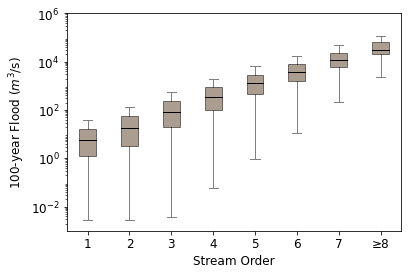

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, ScalarFormatter
import os


fld_mag = pd.read_csv(os.path.join(wd,r'data\flood_100_mag_all_order_remove_outliers.csv'))
fld_change = pd.read_csv(os.path.join(wd,r'C:\Research\GlobalQ\postAnalysis\cache\flood_100_change.csv'))

# Group the data_boxplot DataFrame by 'group' column and extract the 'flow' values for each group
grouped_data_boxplot = [group['fld'].values for _, group in fld_mag.groupby('order')]
# Group the data_barplot DataFrame by 'group' column and extract the 'change', 'uncertainty', and 'star' values for each group
grouped_data_barplot = fld_change.groupby('order')

# Create the figure and axes
fig, ax = plt.subplots()

# Create the secondary y-axis for the boxplots
#ax2 = ax.twinx()
bp = ax.boxplot(grouped_data_boxplot, positions=np.arange(len(grouped_data_boxplot)),patch_artist=True,
                 widths=0.4,showfliers=False)

# Set the color of the center line on the secondary y-axis
for i in np.arange(len((grouped_data_barplot))):
    bp['medians'][i].set_color('black') 
    bp['whiskers'][2*i].set_color('gray')
    bp['whiskers'][2*i+1].set_color('gray')
    #bp['boxes'][i].set_color('red') #set box border color    

# Set the fill color of the boxes
for box in bp['boxes']:
    box.set(facecolor='#593E25',alpha=0.5) 

n=0.005
for cap in bp['caps']:             
    cap.set(color='gray', linewidth=1.0)
    cap.set_xdata(cap.get_xdata() + np.array([-.01,.01]))

ax.set_ylabel(r'100-year Flood ($m^3$/s)', color='black',size=12)  # Use LaTeX formatting for superscript
ax.set_yscale('log')  # Set primary y-axis to log scale
ax.set_ylim(0.001,1000000)
#ax2.invert_yaxis()
# Set y-axis ticks and labels for the secondary y-axis
ax.set_yticks([0.01, 1, 100,10000,1000000])
#ax.yaxis.set_label_coords(1.11, 0.77) 


ax.tick_params(axis='y',labelsize=12)
#ax.spines['right'].set_color('#593E25')

# Set y-axis ticks and labels for the primary y-axis
#ax.set_yticks(np.arange(-2, 3))
#ax.set_yticklabels(np.arange(-2, 3),size=12)

# Add a light gray line at y=0 for the secondary y-axis
ax.axhline(0, color='gray', linestyle='-', linewidth=0.5)


# Set x-axis ticks and labels
xticks = np.arange(len(fld_change))
xticklabels = [str(x+1) if x < 7 else '≥8' for x in xticks]
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels,size=12)  #['1', '2', '≥3'])

# Set x-axis label
ax.set_xlabel('Stream Order',size=12)

# Show the plot
plt.show()
fig.savefig(os.path.join(wd, 'graph\Figure3C'),bbox_inches='tight',dpi=1200)

C:\Users\DONGME~1\AppData\Local\Temp/ipykernel_29172/633608522.py:70: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['-0.3','-0.2','-0.1','0.0','0.1','0.2','0.3','0.4','0.5'],size=12)


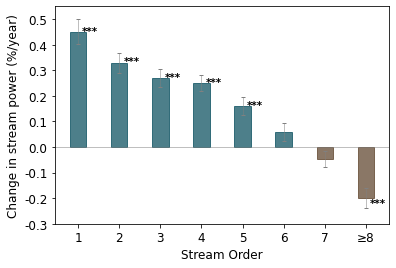

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, ScalarFormatter
import os

sp_fr = pd.read_csv(os.path.join(wd,r'data\change_stream_power_fraction.csv'))
sp_fr_change = sp_fr[['order','slope_perc','unct','significance']] #pd.read_csv(r'C:\Research\GlobalQ\postAnalysis\cache\flood_100_change.csv')

# Group the data_boxplot DataFrame by 'group' column and extract the 'flow' values for each group
grouped_data_boxplot = sp_fr.groupby('order') #[group['frac'].values for _, group in sp_fr.groupby('order')]
# Group the data_barplot DataFrame by 'group' column and extract the 'change', 'uncertainty', and 'star' values for each group
grouped_data_barplot = sp_fr_change.groupby('order')

# Create the figure and axes
fig, ax = plt.subplots()

# Create the primary y-axis for the barplots
bar_positions = np.arange(len(grouped_data_barplot))
    

# Create the secondary y-axis for the boxplots
#ax2 = ax.twinx()
bars = ax.bar(bar_positions, grouped_data_barplot['slope_perc'].mean(), alpha=0.7, width=0.4)

# Add error bars to the bar plots
ax.errorbar(
    bar_positions, grouped_data_barplot['slope_perc'].mean(), yerr=grouped_data_barplot['unct'].mean(),
    fmt='none', ecolor='gray', capsize=2,linewidth=0.5
)

# Add an asterisk (*) at the end of the bar plot based on the 'star' parameter
for i, star in enumerate(grouped_data_barplot['significance'].mean()):
    #print(star)
    bar = bars[i]
    x_position = bar.get_x() - bar.get_width() + 0.7
    if bar.get_height()>0:
        y_position = bar.get_height()+0.005
    else: 
        y_position = bar.get_height()-0.02
    
    if star<0.1 and star>0.01:
        ax.text(
            x_position, y_position, "*", ha='left', va='center', fontweight='bold'
        )
    if star<0.01 and star>0.001:
        ax.text(
            x_position, y_position, "**", ha='left', va='center', fontweight='bold'
        )
    if star<0.001:
        ax.text(
            x_position, y_position, "***", ha='left', va='center', fontweight='bold'
        )
    # Assign colors to the bars based on their values
    change_value = grouped_data_barplot['slope_perc'].mean().iloc[i]
    if change_value >= 0:
        bar.set_color('#024959')
    else:
        bar.set_color('#593E25')
        
# Set y-axis label for the bar plots
ax.set_ylabel('Change in stream power (%/year)',size=12)
#ax2.yaxis.set_label_coords(1.1, 0.78) 

# Set the range of the secondary y-axis
ax.set_ylim(-0.3, 0.55)

# Set y-axis ticks and labels for the primary y-axis
#ax.set_yticks([-0.2,-0,0.2,0.4,0.6]) #np.arange(-0.3, 0.8))
ax.set_yticklabels(['-0.3','-0.2','-0.1','0.0','0.1','0.2','0.3','0.4','0.5'],size=12)

# Add a light gray line at y=0 for the secondary y-axis
ax.axhline(0, color='gray', linestyle='-', linewidth=0.5)

# Set x-axis ticks and labels
xticks = np.arange(len(grouped_data_barplot))
xticklabels = [str(x+1) if x < 7 else '≥8' for x in xticks]
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels,size=12)  #['1', '2', '≥3'])

# Set x-axis label
ax.set_xlabel('Stream Order',size=12)

# Show the plot
plt.show()
fig.savefig(os.path.join(wd, 'graph\Figure3B'),bbox_inches='tight',dpi=1200)

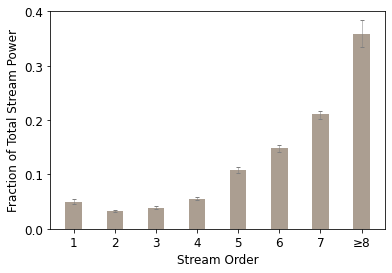

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, ScalarFormatter

sp_fr = pd.read_csv(os.path.join(wd,r'data\change_stream_power_fraction.csv'))
sp_fr_change = sp_fr[['order','slope_perc','unct','significance']] #pd.read_csv(r'C:\Research\GlobalQ\postAnalysis\cache\flood_100_change.csv')

# Group the data_boxplot DataFrame by 'group' column and extract the 'flow' values for each group
grouped_data_boxplot = sp_fr.groupby('order') #[group['frac'].values for _, group in sp_fr.groupby('order')]
# Group the data_barplot DataFrame by 'group' column and extract the 'change', 'uncertainty', and 'star' values for each group
grouped_data_barplot = sp_fr_change.groupby('order')

# Create the figure and axes
fig, ax = plt.subplots()

# Create the primary y-axis for the barplots
bar_positions = np.arange(len(grouped_data_barplot))
bp = ax.bar(bar_positions, grouped_data_boxplot['frac'].mean(),width=0.4,color='#593E25',alpha=0.5)
# add range bar
for i in range(len(bar_positions)):
    range_min = grouped_data_boxplot['frac'].min()[i]
    range_max = grouped_data_boxplot['frac'].max()[i]
    ax.errorbar(bar_positions[i], (range_min + range_max) / 2, yerr=(range_max - range_min) / 2,
                fmt='none', ecolor='gray', capsize=2,linewidth=0.5)
    

ax.set_ylabel(r'Fraction of Total Stream Power', color='black',size=12)  # Use LaTeX formatting for superscript
#ax.set_yscale('log')  # Set primary y-axis to log scale
ax.set_ylim(0,0.4)

ax.tick_params(axis='y')
#ax.spines['right'].set_color('#593E25')

# Set y-axis ticks and labels for the primary y-axis
ax.set_yticks([0,0.1,0.2,0.3,0.4]) #np.arange(-0.3, 0.8))
ax.set_yticklabels(['0.0','0.1','0.2','0.3','0.4'],size=12)

# Set x-axis ticks and labels
xticks = np.arange(len(fld_change))
xticklabels = [str(x+1) if x < 7 else '≥8' for x in xticks]
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels,size=12)  #['1', '2', '≥3'])

# Set x-axis label
ax.set_xlabel('Stream Order',size=12)

# Show the plot
plt.show()
fig.savefig(os.path.join(wd, 'graph\Figure3A'),bbox_inches='tight',dpi=1200)